# PHYS 325 Scientific Computing -- Fall 2019

## 2.6 Ordinary differential equations (ODEs)

Good references for this chapter: 

- Chapter 8 of "Computational Physics" by Mark Newman 
- Chapter 16 of "Numerical Recipes"

ODEs only contain derivatives with respect to **one variable**

=> no partial derivatives

Among the most common computational physics problems:

- describing how a physical system changes with time
- equations of motion, Schroedinger's equation, electrical circuits,...
- also important in biology, chemistry, engineering,...

### 2.6.1 First-order ODEs

=> highest degree of differentiation is a first derivative

basic form:

$$\frac{dx(t)}{dt}=f(x(t),t)$$

and

$$f(x(t_0),t_0)=x_0$$

- $t$ independent variable
- $x(t)$ dependent variable
- one initial (or boundary) condition needed to specify solution
- initial condition is part of the problem!
- we want to propagate the solution forward to other values of $t$ (e.g. evolve system with time)

Analytical methods:

- separation of variables
- transformation

Usually not analytically solvable...

#### Example: radioactive decay

- the decay of elements is a statistical process
- each atom has a certain probability to decay
- you can estimate how many are likely to decay in some given amount of time...
- ...but you cannot point to which actual atoms will decay

mathematically:

$$dN = -\lambda N dt$$

where 

- $N$ is the number of atoms at some time
- $dt$ is a differential time element
- $dN$ is the change in the number of atoms (negative because decay)
- $\lambda$ is a constant associated with the element (decay constant)

First order ODE:

$$N'(t) = {{dN}\over{dt}} = -\lambda N$$

Initial condition:

$$N(t=0)=N_0$$

Solution by separation of variables:

$${{dN}\over{N}} = -\lambda dt$$

Integrating both sides of the equation:

$$\int{{{dN}\over{N}}} = -\lambda\int{dt}$$

$$\Rightarrow \log(N) = -\lambda t + C$$

With the initial condition:

$$\log(N_0) = C$$

The solution becomes

$$\log(N) - \log(N_0) = \log\left({{N}\over{N_0}}\right) = -\lambda t$$

Exponentiating both sides and rearranging: 

$$N(t)= N_0 e^{-\lambda t}$$

Half life $T_{1/2}$ (time for half of the atoms to decay):

$$T_{1/2} = {{0.693}\over{\lambda}}$$

#### Numerical Solution using Euler's method

Taylor Series expansion for $x$ around some time $t_0$:

$$x(t_0 +\Delta t) = x(t_0)+\left.\frac{dx(t)}{dt}\right|_{t=t_0}\Delta t + \mathcal{O}(\Delta t^2)$$

Substitute differential equation $\frac{dx}{dt} = f$ to get

$$x(t_0+\Delta t) = x(t_0)+\Delta t f(x(t_0),t_0)$$

- repeatedly apply this formula
- each time replace $x(t_0)$ with the new value of $x(t_0+\Delta t)$
- this is an iterative method (compare nonlinear equations chapter!)

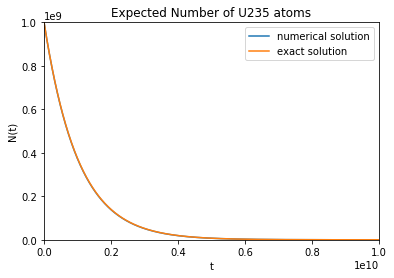

In [1]:
# Euler's method: simple example
%matplotlib inline

# U235 decay
import numpy as np
import matplotlib.pyplot as plt

decayc = 3.1536e7*3.12e-17   # decay constant in inverse years for U235

def f(n):
    return -decayc*n

def exactSolution(n0, t):
    return n0*np.exp(-decayc*t)

# numerical parameters
start = 0.0 
end = 10e9
numSteps = 1000
stepSize = (end-start)/numSteps

# Initial condition: number of atoms at start time
n0 = 1e9          
n = n0

# create the array of time values and (empty) N values
tpoints = np.arange(start, end, stepSize)
nuranium = []

# loop over all times, supplementing nuranium each time
for t in tpoints:
    nuranium.append(n)
    n += stepSize*f(n)

# plot results
plt.plot(tpoints, nuranium, label = 'numerical solution')
plt.plot(tpoints, exactSolution(n0,tpoints), label = 'exact solution')
plt.xlim(start, end)
plt.ylim(0,n0)
plt.title("Expected Number of U235 atoms")
plt.xlabel("t")
plt.ylabel("N(t)")
plt.legend(loc = 'upper right')
plt.show()

#### More Advanced Example

$$\frac{dx}{dt}=-x^3(t) + \sin(t)$$

(the derivative is a function of both the dependent and the independent variable)

Initial condition: $x(t=0)=0$

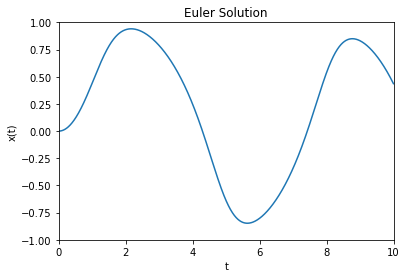

In [2]:
# Euler's method: more advanced example

def f(x,t):
    return -x**3 + np.sin(t)

# numerical parameters
start = 0.0 
end = 10
numSteps = 2000
stepSize = (end-start)/numSteps

# initial condition
x0 = 0.0
x = x0

# create time array and (empty) array for solution
tpoints = np.arange(start, end, stepSize)
xpoints = []

# loop over all times
for t in tpoints:
    xpoints.append(x)
    x += stepSize*f(x,t)

# plot results
plt.xlim(start, end)
plt.ylim(-1, 1)
plt.plot(tpoints,xpoints)
plt.title("Euler Solution")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

#### Error of the Euler method

- each step is accurate to $\mathcal{O}(\Delta t^2)$
- but the number of steps is proportional to $1/\Delta t$

=> final error is $\mathcal{O}(\Delta t)$

This method is a **first-order method**

- improvements by reducing step size
- adaptive methods by systematically halving the step size until desired accuracy (compare with section on numerical integration!)
- improvements by using higher order methods

#### Runge-Kutta methods

- systematic higher order improvements
- almost as simple as Euler's method but much more accurate
- equally fast or faster than Euler's method
- key idea: evaluate the derivative also at intermediate points

$$
\begin{aligned}
x(t_0 +\Delta t) &= x(t_0 + \Delta t/2)\ +\left.\frac{dx(t)}{dt}\right|_{t=t_0 + \Delta t/2}\frac{\Delta t}{2} \ +\left.\frac{d^2x(t)}{dt^2}\right|_{t=t_0 + \Delta t/2}\frac{\Delta t^2}{8}\ + \mathcal{O}(\Delta t^3) & \\
x(t_0) &= x(t_0 + \Delta t/2)\ -\left.\frac{dx(t)}{dt}\right|_{t=t_0 + \Delta t/2}\frac{\Delta t}{2}\ +\left.\frac{d^2x(t)}{dt^2}\right|_{t=t_0 + \Delta t/2}\frac{\Delta t^2}{8}\ + \mathcal{O}(\Delta t^3)
\end{aligned}
$$

Subtract the equations:

$$x(t+\Delta t)  - x(t) = \Delta t\left. \frac{dx(t)}{dt}\right|_{t+\frac{\Delta t}{2}} + \mathcal{O}(\Delta t^3)$$

Again substitute from the ODE:

$$x(t+\Delta t)= x(t) + \Delta t f\left(x\left(t+\frac{\Delta t}{2}\right),t+\frac{\Delta t}{2}\right) + \mathcal{O}(\Delta t^3)$$

=> improves the accuracy of the result by one factor of $\Delta t$

=> 2nd order Runge-Kutta method

Estimate the remaining unknown $x(t+\Delta t/2)$ with the Euler method (propagate by half a step) 

Summary of algorithm: TYPE THESE EQUATONS

- $k_1 = \Delta t f(x,t)$

- $k_2 = \Delta t f\left(x+\frac{k_1}{2},t+\frac{\Delta t}{2}\right)$

- $x(t+\Delta t) = x(t) + k_2$

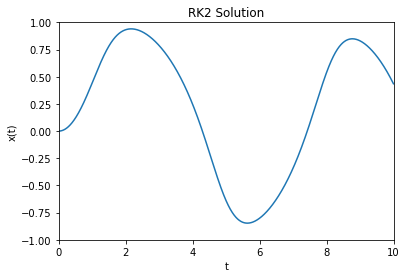

In [3]:
# 2nd order Runge-Kutta method
def f(x,t):
    return -x**3 + np.sin(t)

# this part stays the same as before
start = 0.0 
end = 10
numSteps = 2000
stepSize = (end-start)/numSteps

x0 = 0.0
x = x0

tpoints = np.arange(start, end, stepSize)
xpoints = []

# modify for loop for intermediate and final RK2 calculation
for t in tpoints:
    xpoints.append(x)
    k1 = stepSize*f(x,t)
    k2 = stepSize*f(x+0.5*k1, t+0.5*stepSize)
    x += k2

# plot results
plt.xlim(start, end)
plt.ylim(-1, 1)
plt.plot(tpoints,xpoints)
plt.title("RK2 Solution")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

Can improve error even further by going to higher orders!

- 1st order Runge-Kutta: Euler's method
- 2nd order Runge-Kutta: midpoint or Euler-Cromer method
- most common: 4th order Runge-Kutta (good balance between accuracy and programmability)

#### 4th order Runge-Kutta

Algorithm: TYPE THESE EQUATIONS

- $k_1 = \Delta t f(x,t)$

- $k_2=\Delta t f(x+\frac{k_1}{2},t+\frac{\Delta t}{2})$

- $k_3=\Delta t f(x+\frac{k_2}{2},t+\frac{\Delta t}{2})$

- $k_4=\Delta t f(x+k_3,t+\Delta t)$

- $x(t+\Delta t) = x(t) + \frac{1}{6}(k_1+2k_2+2k_3+k_4)$


Single step error $\mathcal{O}(\Delta t^5)\Rightarrow$ total accuracy of $\mathcal{O}(\Delta t^4)$

The price to pay is more evaluations of the derivative function (four evaluations per step)

### 2.6.2 Multiple Variables 

- system of simultaneous differential equations 
- equations define the changes in each dependent variable
- still only a single independent variable 
- the variables can be dependent on each other, however!

**Example**

$$
\begin{aligned}
\frac{dx}{dt} & = xy - x \\
\frac{dy}{dt} & = y-xy + \sin^2(\omega t)
\end{aligned}
$$

=> treat the variables as elements in a vector (and the differential equations as elements of a vector equation)

$$\frac{d{\vec{r}}}{dt}=\vec{f}(\vec{r},t)$$

with $\vec{r}=(x_1,x_2,.....)$ and $\vec{f}(\vec{r},t)= (f_{x_1}(\vec{r},t),f_{x_2}(\vec{r},t),...)$

- not much more difficult than single variable case
- Taylor series for vectors
- analogous derivation of Runge-Kutta formulas
- the $k_n$ variables are now vectors: $\vec{k}_n$

**4th order Runge-Kutta**

$$
\begin{aligned}
\vec{k}_1 &= \Delta t \vec{f}(\vec{x},t)\\
\vec{k}_2 &=\Delta t f\left(\vec{x}+\frac{\vec{k}_1}{2},t+\frac{\Delta t}{2}\right)\\
\vec{k}_3 &=\Delta t f(\vec{x}+\frac{\vec{k}_2}{2},t+\frac{\Delta t}{2})\\
\vec{k}_4 &=\Delta t f(\vec{x}+\vec{k}_3,t+\Delta t)\\
\vec{x}(t+\Delta t) &= \vec{x}(t) + \frac{1}{6}(\vec{k}_1+2\vec{k}_2+2\vec{k}_3+\vec{k}_4)
\end{aligned}
$$

**For above example with**

- $\omega = 1$
- initial condition $x(t=0) = y(t=0) = 1$
- solution from $t=0$ to $t=10$

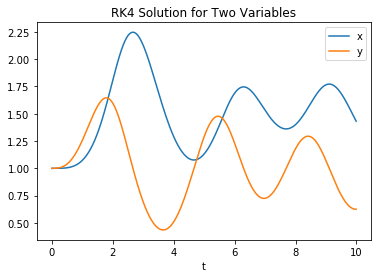

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# definition of the ODE as vector function
def f(r,t):
    # x and y are vector elements
    x=r[0]
    y=r[1]
    fx = x*y - x
    fy = y - x*y + np.sin(t)**2
    return np.array([fx,fy],float)

# numerical parameters, as before
start = 0.0 
end = 10
numSteps = 1000
stepSize = (end-start)/numSteps

# now we have two solution vectors, one for each variable
tpoints = np.arange(start, end, stepSize)
xpoints = []
ypoints = []

# initial conditions for x and y
r = np.array([1.0,1.0],float)   

# all steps are as normal RK4, but vector valued quantities used
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = stepSize*f(r,t)        
    k2 = stepSize*f(r+0.5*k1,t+0.5*stepSize)   
    k3 = stepSize*f(r+0.5*k2,t+0.5*stepSize)
    k4 = stepSize*f(r+k3,t+stepSize)
    r += (k1+2.*k2+2.*k3+k4)/6

# plot results
plt.plot(tpoints,xpoints,label='x')
plt.plot(tpoints,ypoints,label='y')
plt.title("RK4 Solution for Two Variables")
plt.xlabel("t")
plt.legend(loc='upper right')
plt.show()

### 2.6.3 Second order ODEs

=> highest degree of differentiation is a second derivative

(this means that we need two initial/boundary conditions!)

Most common physics laws are second-order differential equations:

- Newton's second law,
- (time-independent) Schrodinger equation,
- Laplace and Poisson equations, 
- heat equation,...

Trick: transformation to two first-order equations

$$f\left(\frac{d^2x(t)}{dt^2},\frac{dx(t)}{dt},x(t),t\right)=0$$

or in simpler notation

$$f(x''(t),x'(t),x(t),t)=0$$

Define:

$$y(t) = x'(t)$$

Substitute into original equation:

$$f(y'(t), y(t), x(t), t) = 0$$

This is now a first order equation in two variables: $x(t)$ and $y(t)$!

#### Example: harmonic oscillator

$$\frac{d^2\theta(t)}{dt^2} + \frac{g}{L}\sin(\theta(t))=0$$ 

Transform:

$$
\begin{aligned}
\omega(t) &= \frac{d\theta(t)}{dt}\\
\frac{d\omega(t)}{dt} &= \frac{d^2\theta(t)}{dt^2}
\end{aligned}
$$

Substitute and obtain:

$$
\begin{aligned}
\frac{d\theta(t)}{dt} &= \omega(t)\\
\frac{d\omega(t)}{dt} &= -\frac{g}{L}\sin(\theta(t))
\end{aligned}
$$ 

Solution using RK4:

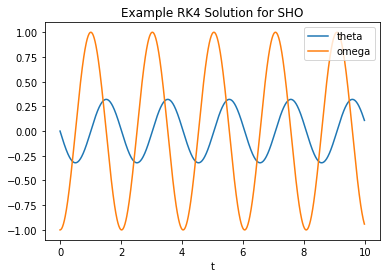

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(r, t, omegasqr):
    theta=r[0]        #unpack the array r into local variables
    omega=r[1]
    #calculate the derivatives 
    dtheta = omega
    domega = -omegasqr*np.sin(theta)
    return np.array([dtheta,domega],float)  #first element is theta derivative
                                            #second is the omega derivative

start = 0.0
end = 10.0
numSteps = 1000
stepSize = (end-start)/numSteps

g=9.8             # physical and system constants
L=1.0
omegasqr=g/L

tpoints = np.arange(start,end,stepSize)
omegapts = []
thetapts = []
# initial conditions for omega and theta, summarized in vector r
r = np.array([0.0,-1.0],float)   

# all steps are as normal RK4, but vector valued quantities used
for t in tpoints:
    thetapts.append(r[0])
    omegapts.append(r[1])

    k1 = stepSize*f(r,t,omegasqr)
    k2 = stepSize*f(r+0.5*k1,t+0.5*stepSize,omegasqr)
    k3 = stepSize*f(r+0.5*k2,t+0.5*stepSize,omegasqr)
    k4 = stepSize*f(r+k3,t+stepSize,omegasqr)
    r += (k1+2.*k2+2.*k3+k4)/6

# plot results
plt.plot(tpoints,thetapts,label='theta')
plt.plot(tpoints,omegapts,label='omega')
plt.title("Example RK4 Solution for SHO")
plt.xlabel("t")
plt.legend(loc='upper right')
plt.show()

### 2.6.4 Adaptive methods

=> spend more time and resources on interesting and less on flat or non-interesting regions

=> basically always used in large-scale calculations

![Adaptive step size](images/fig8-6.png)

Image from Newman's book

Two part process:

- estimate the error on each step
- adjust step size accordingly

Most straightforward: **step doubling** (here we always use RK4 as example)

- take each step twice: once as a full step, then, independently, as two half steps

  ![Step doubling](images/fig8-7.png)
  Image from Newman's book

- as before: the difference between the results is a measure for the error

  $$\epsilon = \frac{1}{30}(x_1-x_2)$$
  
- compare this with accuracy goal
  
- double, halve, or keep the step depending on this

- if we failed our accuracy goal we need to *repeat the current step*, too! (remember that errors accumulate!)

- more precise method: adjust the step size to meet the accuracy goal $\delta$ exactly

  $$\Delta t_{\rm opt} = \Delta t\left(\frac{30\Delta t\delta}{|x_1-x_2|}\right)^{1/4}$$
  
- overhead for doing two kinds of steps: 11 instead of 8 evaluations for the smaller step size (some points are shared) 

- overhead cost is therefore only a factor 1.375

- this pays off because we may increase steps and because we are confident in our accuracy

- sometimes $x_1$ and $x_2$ will be very close *by chance*: set an upper bound on how much the step size can increase in each iteration

### 2.6.5 Other methods for ODEs

(many of these are well described in Newman's book, Numerical Recipes also has very detailed descriptions)

- [Leapfrog method](https://en.wikipedia.org/wiki/Leapfrog_integration)
- Verlet algorithm => later in the lecture
- [Richardson extrapolation](https://en.wikipedia.org/wiki/Richardson_extrapolation) and [Bulirsch-Stoer method](https://en.wikipedia.org/wiki/Bulirsch%E2%80%93Stoer_algorithm)
     - only work for smooth functions
     - not good when functions have singularities
     - but much faster for smooth functions
     - more difficult to program
- [Predictor-corrector methods](https://en.wikipedia.org/wiki/Predictor%E2%80%93corrector_method)

### 2.6.6 Boundary value problems

So far: Initial conditions => evolve in time

Also common in physics, but more difficult: boundary value problems

#### Shooting method

Idea: trial-and-error

=> search for correct values of initial conditions that match the given boundary conditions

Example: vertical position of thrown ball

$$
\frac{d^2y}{dt^2} = -g \Rightarrow\left\{
\begin{align}
\frac{dy}{dt} &= v\\
\frac{dv}{dt} &= -g
\end{align}\right.
$$

boundary conditions: $y(t=0) = y(t=10) = 0$

> Note that we do not have the initial velocity $v(t=0)$

In [6]:
# This code is adapted from Mark Newman's book

import numpy as np

g = 9.81                # Acceleration due to gravity
start = 0.0             # Initial time
end = 10.0              # Final time
numSteps = 1000         # Number of Runge-Kutta steps
stepSize = (end-start)/numSteps
target = 1e-10          # Target accuracy

# Function for Runge-Kutta calculation
def f(r):
    y = r[0]
    v = r[1]
    fy = v
    fv = -g
    return np.array([fy,fv],float)

# Function to solve the equation and calculate the final height
# It's argument is the initial condition for the velocity
def height(velocity):
    r = np.array([0.0, velocity],float)
    for t in np.arange(start,end,stepSize):
        k1 = stepSize*f(r)
        k2 = stepSize*f(r+0.5*k1)
        k3 = stepSize*f(r+0.5*k2)
        k4 = stepSize*f(r+k3)
        r += (k1+2*k2+2*k3+k4)/6
    return r[0]

# Main program performs a binary search to find correct initial velocity
v1 = 0.01        # initial guess small
v2 = 1000.0      # initial guess large
h1 = height(v1)
h2 = height(v2)

# narrowing down on the correct value
while abs(h2-h1)>target:
    vp = (v1+v2)/2        # take midpoint between two velocities
    hp = height(vp)
    # replace one of the boundaries by midpoint
    if h1*hp>0:
        v1 = vp
        h1 = hp
    else:
        v2 = vp
        h2 = hp

v = (v1+v2)/2
print("The required initial velocity is",v,"m/s")

The required initial velocity is 49.04999999999815 m/s


#### Eigenvalue problems

very important special case of boundary value problems!

- equations are linear and homogeneous
- very important example: Schrödinger equation

  $$-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+V(x)\psi(x) = E\psi(x)$$
  
  (every term is linear in $\psi(x)$)
  
Example: infinite square well

$$
V(x)=\left\{
\begin{align}
0\ \ & {\rm for}\ 0<x<L\\
\infty\ \ & {\rm otherwise}
\end{align}\right.
$$

This gives us the boundary condition: $\psi(0)=\psi(L)=0$

=> remember that solutions exist only for certain values of the energy $E$ (quantized energies)

Task:
- find allowed energies
- solve Schrödinger equation for these energies

Idea: instead of varying the initial condition => vary the energy $E$

In [7]:
# This code is adapted from Mark Newman's book

import numpy as np

# import physical constants from SciPy
from scipy.constants import hbar, m_e, e

L = 5.2917721e-11     # Bohr radius

# numerical parameters
numSteps = 1000
stepSize = L/numSteps

# Potential function => trivial in this example
# (but we can easily generalize the problem by replacing this by a complicated potential!)
def V(x):
    return 0.0

# Schroedinger equation
def f(r,x,E):
    psi = r[0]
    phi = r[1]    # this is what we will call the derivative of psi
    fpsi = phi    # we turned the second order equation into two first order equations, as usual
    fphi = (2*m_e/hbar**2)*(V(x)-E)*psi
    return np.array([fpsi,fphi],float)

# Calculate the wavefunction for a particular energy with RK4
def solve(E):
    psi = 0.0
    phi = 1.0     # the initial condition for phi doesn't matter => only affects normalization
    r = np.array([psi,phi],float)

    for x in np.arange(0,L,stepSize):
        k1 = stepSize*f(r,x,E)
        k2 = stepSize*f(r+0.5*k1,x+0.5*stepSize,E)
        k3 = stepSize*f(r+0.5*k2,x+0.5*stepSize,E)
        k4 = stepSize*f(r+k3,x+stepSize,E)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0]

# Main program to find the energy using the secant method
E1 = 0.0
E2 = e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2)>target:
    psi1, psi2 = psi2, solve(E2)
    E1, E2 = E2, E2-psi2*(E2-E1)/(psi2-psi1)

print("E =",E2/e,"eV")

E = 134.28280791143487 eV


### 2.6.7 Python libraries

see [here](https://docs.scipy.org/doc/scipy/reference/integrate.html) for documentation

This is an older routine, which might be missing features, but it is efficient:

In [4]:
# Solves a system of ODEs using lsoda from the FORTRAN library odepack
# documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
import numpy as np
from scipy.integrate import odeint

# remember our harmonic oscillator example:
def f(r, t, omegasqr):
    theta=r[0]
    omega=r[1]
    dtheta = omega
    domega = -omegasqr*np.sin(theta)
    return np.array([dtheta,domega],float)

# initial condition as vector
initial = [0.0, -1.0]

# time interval
start = 0.0
end = 10.0
tvec = np.linspace(start, end, 101)

# constants
g=9.8
L=1.0
omegasqr=g/L

sol = odeint(f, initial, tvec, args = (omegasqr,) )

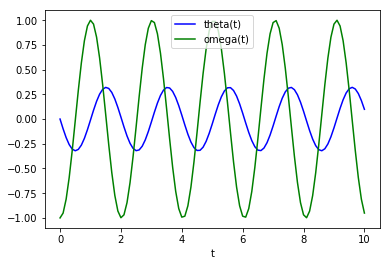

In [5]:
# plot above result
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(tvec, sol[:, 0], 'b', label='theta(t)')
plt.plot(tvec, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.show()

Newer solvers for initial value problems:

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 206
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])
 t_events: None
        y: array([[ 0.        , -0.09837547, -0.18724435, -0.25798261, -0.30392904,
        -0.32088601, -0.30700197, -0.2636714

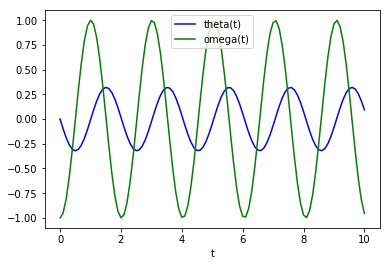

In [6]:
# documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
from scipy.integrate import solve_ivp

# solve_ivp does not allow passing function arguments
# also the order of arguments is different
def f_mod(t, r):
    return f(r, t, omegasqr)

# note the different syntax! only the first 3 arguments are required
# method is optional, Runge-Kutta 4 is default
sol = solve_ivp(f_mod, (start, end), initial, method='RK45', t_eval = tvec)
print(sol)

# plot result
plt.plot(sol.t, sol.y[0], 'b', label='theta(t)')
plt.plot(sol.t, sol.y[1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.show()

Boundary value problems:

       message: 'The algorithm converged to the desired accuracy.'
         niter: 1
             p: None
 rms_residuals: array([4.92364563e-16, 5.76010909e-16, 3.14999702e-16, 1.78858005e-16])
           sol: <scipy.interpolate.interpolate.PPoly object at 0x7ff7bf479518>
        status: 0
       success: True
             x: array([ 0. ,  2.5,  5. ,  7.5, 10. ])
             y: array([[-7.10542736e-15,  9.18750000e+01,  1.22500000e+02,
         9.18750000e+01,  0.00000000e+00],
       [ 4.90000000e+01,  2.45000000e+01,  0.00000000e+00,
        -2.45000000e+01, -4.90000000e+01]])
            yp: array([[ 49. ,  24.5,   0. , -24.5, -49. ],
       [ -9.8,  -9.8,  -9.8,  -9.8,  -9.8]])

The required initial velocity is 49.00000000000002 m/s


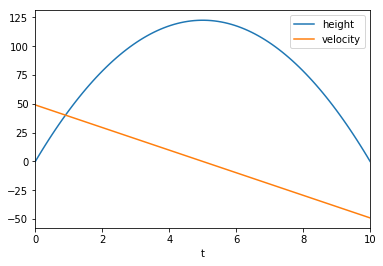

In [7]:
# documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html
from scipy.integrate import solve_bvp

# vertical position of thrown ball example
# needs to have (at least) two arguments: t and r (r may be vector)
def f(t, r):
    y = r[0]
    v = r[1]
    fy = v*np.ones_like(t)
    fv = -g*np.ones_like(t)
    return np.vstack((fy,fv))

# function evaluating residuals of the boundary conditions
def bc(ra, rb):
    return np.array([ra[0] - 0, rb[0] - 0])

# initial mesh, here with 5 nodes
start = 0.0
end = 10.0
nnodes = 5
t = np.linspace(start, end, nnodes)

# initial guess for the function values at the mesh nodes
initial = np.zeros((2, t.size))

# run the solver
result = solve_bvp(f, bc, t, initial)
print(result)
print("\nThe required initial velocity is", result.sol(0)[1], "m/s")

# plot the result
t_plot = np.linspace(start, end, 100)
y_plot = result.sol(t_plot)[0]
v_plot = result.sol(t_plot)[1]
plt.plot(t_plot, y_plot, label='height')
plt.plot(t_plot, v_plot, label='velocity')
plt.legend()
plt.xlabel("t")
plt.xlim(start,end)
plt.show()

### Outlook: partial differential equations (PDEs)

see Chapter 9 in Newman's book for more information

- involve partial derivatives with at least 2 different variables
- in physics usually space and time
- generally much more difficult than ODEs
- often no libraries available
- examples:
    - wave equation
    - diffusion equation
    - Laplace and Poisson equation
    - time-dependent Schrödinger equation
- again have initial and boundary value problems (for PDEs boundary value problems are usually simpler)
- methods for boundary value problems:
    - [Method of finite differences](https://en.wikipedia.org/wiki/Finite_difference_method)
        - simplest method
        - introduce equidistant grid
        - replace derivatives by differences
        - this turns the problem into a set of linear equations
        - these can also be solved with the relaxation method (as we did for nonlinear equations) => Jacobi method
    - speed-ups of the Jacobi method
        - overrelaxation
        - Gauss-Seidel method
    - finite volume method and finite element method
- methods for initial value problems:
    - the FTCS method (forward-time centered-space)
        - based on finite difference method
        - turns the problem into a set of ODEs
        - usually a very large number of ODEs, which are solved with Euler's method
    - Crank-Nicolson methods
        - another finite difference method
        - used for heat equation and similar equations
        - second-order method in time
    - spectral methods
        - based on Fourier transforms